# My Attempt at Classifying Monkeys
### Author Anukool Purohit

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = "data/monkeys/"
sz = 224

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
os.listdir(PATH)

['monkey_labels.txt',
 'valid',
 'models',
 'training.zip',
 'train',
 'tmp',
 'validation.zip']

In [9]:
os.listdir(f'{PATH}valid')

['n0', 'n2', 'n9', 'n6', 'n8', 'n4', 'n7', 'n5', 'n3', 'n1']

In [10]:
files = os.listdir(f'{PATH}valid/n0')[:5]
files

['n0014.jpg', 'n0013.jpg', 'n012.jpg', 'n017.jpg', 'n0017.jpg']

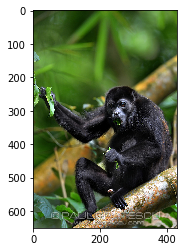

In [11]:
img = plt.imread(f'{PATH}valid/n0/{files[0]}')
plt.imshow(img)

In [12]:
img.shape

(650, 430, 3)

In [13]:
img[:4,:4]

array([[[30, 55, 16],
        [29, 54, 15],
        [29, 54, 15],
        [29, 54, 14]],

       [[30, 55, 16],
        [29, 54, 15],
        [29, 54, 15],
        [29, 54, 14]],

       [[30, 55, 16],
        [29, 54, 15],
        [29, 54, 14],
        [29, 54, 14]],

       [[31, 53, 14],
        [29, 54, 14],
        [29, 54, 14],
        [29, 54, 14]]], dtype=uint8)

## First Quick Model

In [14]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute = True)
learn.fit(0.01,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      1.26163    0.324633   0.946875  
    1      0.658666   0.129227   0.971875                 



[0.12922654, 0.971875]

In [15]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [16]:
data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [18]:
log_preds = learn.predict()
log_preds.shape

(272, 10)

In [19]:
log_preds[:10]

array([[ -0.05724,  -6.7558 ,  -5.53806,  -8.87072,  -8.56795,  -6.65278,  -7.27415,  -6.61608,  -6.69435,
         -3.08695],
       [ -0.00382, -10.88002,  -6.23841, -12.82726, -12.51448, -11.93688, -11.19409, -13.90494, -11.30061,
         -6.31987],
       [ -0.23932,  -5.89534,  -3.96508,  -6.92311,  -5.55302,  -6.58903,  -6.68866,  -5.16976,  -4.8948 ,
         -1.76922],
       [ -0.09731,  -3.56337,  -4.89701,  -7.34881,  -8.06175,  -5.43547,  -7.93532,  -6.96306,  -4.99865,
         -3.13392],
       [ -0.00027, -12.34413,  -9.63981, -13.45024, -11.27642,  -9.94845, -12.45277, -12.52292, -11.17772,
         -9.08907],
       [ -0.0207 ,  -7.24819,  -6.19463,  -6.81961,  -8.38919,  -5.29045,  -8.32352,  -7.56577,  -7.21867,
         -4.61728],
       [ -0.0763 ,  -4.53664,  -4.7302 ,  -5.54759,  -7.8596 ,  -5.32998,  -7.96727,  -7.13725,  -7.02336,
         -3.15197],
       [ -0.00971,  -7.23591,  -7.32912,  -9.12042, -10.15615,  -6.9627 ,  -9.33939,  -7.79939,  -6.84345,
    

In [20]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [22]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      2.204794   173.267731 0.475     



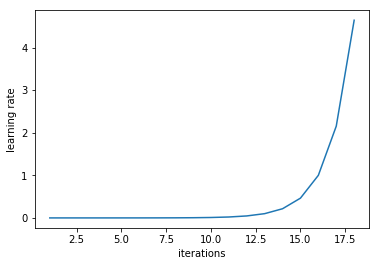

In [23]:
learn.sched.plot_lr()

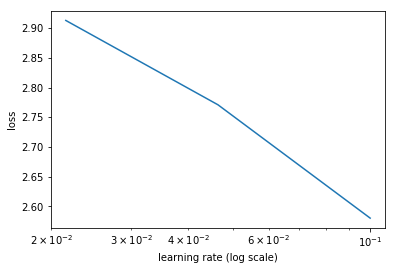

In [24]:
learn.sched.plot()

In [25]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [28]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [29]:
ims = np.stack([get_augs() for i in range(6)])

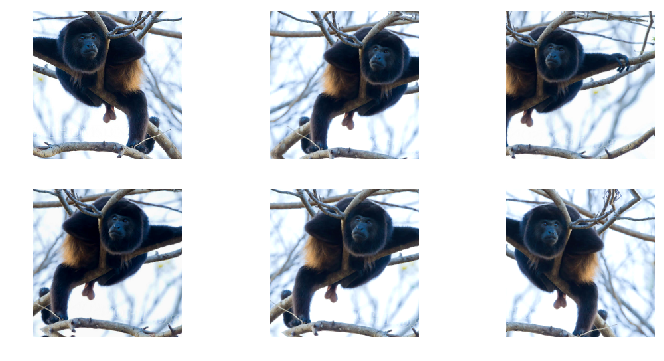

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [38]:
learn.fit(1e-1,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.193895   0.033106   0.990625  
    1      0.190836   0.066893   0.984375                 
    2      0.153597   0.027028   0.990625                 



[0.027028043, 0.990625]

In [39]:
learn.precompute = False

In [41]:
learn.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.068278   0.018922   0.996875  
    1      0.071952   0.015143   0.99375                    
    2      0.066944   0.027951   0.99375                    



[0.027951201, 0.99375]

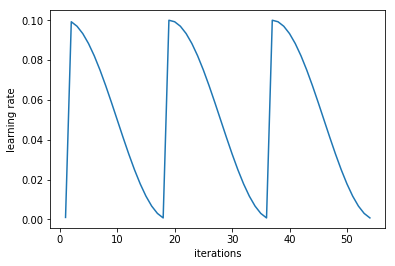

In [42]:
learn.sched.plot_lr()

In [43]:
learn.save('BandarhiBandar')

In [44]:
learn.load('BandarhiBandar')

In [45]:
learn.unfreeze()

In [46]:
lr = np.array([1e-3,1e-2,1e-1])

In [48]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.156635   0.052989   0.984375  
    1      0.16318    0.138727   0.971875                  
    2      0.128674   0.067515   0.984375                  
    3      0.109052   0.096063   0.975                     
    4      0.101126   0.138897   0.98125                    
    5      0.118376   0.069337   0.9875                    
    6      0.117446   0.062042   0.990625                   



[0.06204152, 0.990625]

#### Confusion Matrix

In [52]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [53]:
accuracy_np(probs,y)

0.9852941176470589

In [55]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,preds)

[[26  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  1  0  0  0]
 [ 0  0  0 28  0  0  1  1  0  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  1 25  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 26]]


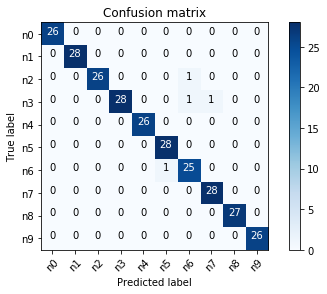

In [57]:
plot_confusion_matrix(cm,data.classes)